![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [2]:
# Ignorar alertas
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import pandas as pd
import numpy as np

In [4]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

In [5]:
# Visualización datos de entrenamiento
dataTraining.head()

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22
1,1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22
2,2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37
3,3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27


In [6]:
# Visualización datos de test
dataTesting.head()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


In [7]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 100, index=dataTesting.index, columns=['Popularity'])

In [8]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission_file.csv', index_label='ID')
y_pred.head()

,Popularity
0,37.454012
1,95.071431
2,73.199394
3,59.865848
4,15.601864


In [9]:
# Visualización de la información del dataset de entrenamiento
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        79800 non-null  int64  
 1   track_id          79800 non-null  object 
 2   artists           79800 non-null  object 
 3   album_name        79800 non-null  object 
 4   track_name        79800 non-null  object 
 5   duration_ms       79800 non-null  int64  
 6   explicit          79800 non-null  bool   
 7   danceability      79800 non-null  float64
 8   energy            79800 non-null  float64
 9   key               79800 non-null  int64  
 10  loudness          79800 non-null  float64
 11  mode              79800 non-null  int64  
 12  speechiness       79800 non-null  float64
 13  acousticness      79800 non-null  float64
 14  instrumentalness  79800 non-null  float64
 15  liveness          79800 non-null  float64
 16  valence           79800 non-null  float6

### Modelo de regresión para la predicción de la popularidad de canciones
El conjunto de datos describe los siguientes tipos de variables
Variables de predicción
* int64 : 1 (Unnamed 0) - Inecesaria para el modelo
* object : 1 (track_id) - Inecesaria para el modelo
* object : 4 variables categóricas (artitst, album_name, track_name, track_genre)
* int64 : 4 variables numéricas enteras (duration_ms, key, mode, time_signature) 
* int64 : 1 variable numérica entera (popularity) - Variable de Predicción
* bool : 1 variable binaria (explicit)
* float64 : 9 variables numéricas decimales (danceability, energy, loudness, spechiness, acoushiness, instrumentalness, liveness, valence, tempo)


### Una sugerencia interesante es la variable categórica 'track_name' hacer subproceso: 
* Determinar si la longitud del nombre de la canción determina su popularidad
* Determinar si existen palabras especcíficas que incluídas dentro del nombre de la canción, afectan su popularidad

In [10]:
# dataTraining['track_genre'].unique()

In [11]:
# Crear una copia del conjunto de datos de origen
df_Train = dataTraining.copy()

df_Train['artist_n'] = df_Train['artists'].astype('category').cat.codes             # artists llevado a numérico
df_Train['album_name_n'] = df_Train['album_name'].astype('category').cat.codes      # album_name llevado a numérico 
df_Train['track_genre_n'] = df_Train['track_genre'].astype('category').cat.codes    # track_genre llevado a numérico
df_Train['track_name_length'] = df_Train['track_name'].apply(len)                   # track_name = longitud del nombre de la canción  

# Eliminar las columnas innecesarias
df_Train = df_Train.drop(columns=['Unnamed: 0', 'track_id', 'track_name', 'artists', 'track_genre', 'album_name'])

df_Train.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,artist_n,album_name_n,track_genre_n,track_name_length
0,211533,False,0.305,0.8490,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,22,13481,18054,41,10
1,196000,False,0.287,0.1900,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,22,7754,10815,76,38
2,216506,False,0.583,0.5090,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,37,21526,28726,54,18
3,218346,False,0.163,0.0368,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,0,8029,24834,16,28
4,173160,False,0.647,0.9210,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,27,20008,26251,109,12


In [12]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   duration_ms        79800 non-null  int64  
 1   explicit           79800 non-null  bool   
 2   danceability       79800 non-null  float64
 3   energy             79800 non-null  float64
 4   key                79800 non-null  int64  
 5   loudness           79800 non-null  float64
 6   mode               79800 non-null  int64  
 7   speechiness        79800 non-null  float64
 8   acousticness       79800 non-null  float64
 9   instrumentalness   79800 non-null  float64
 10  liveness           79800 non-null  float64
 11  valence            79800 non-null  float64
 12  tempo              79800 non-null  float64
 13  time_signature     79800 non-null  int64  
 14  popularity         79800 non-null  int64  
 15  artist_n           79800 non-null  int16  
 16  album_name_n       798

In [40]:
# df_Train['track_genre_n'].unique()

In [13]:
# Importación de librerias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

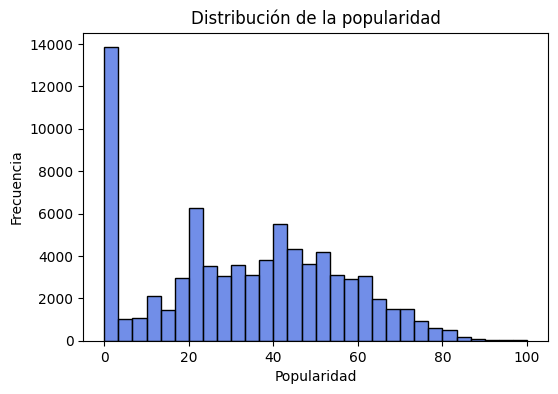

In [14]:
# Gráfica de la distribución de popularidad (variable objetivo)
plt.figure(figsize=(6, 4))
sns.histplot(df_Train['popularity'], bins=30, color='royalblue')
plt.title('Distribución de la popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

#### Distribución de la variable objetivo en el conjunto de entrenamiento
* Se aprecia una distribución asimétrica de los datos, con una alta concentración en los valores bajos de popularidad, lo que podría representar un desbalance de clases.

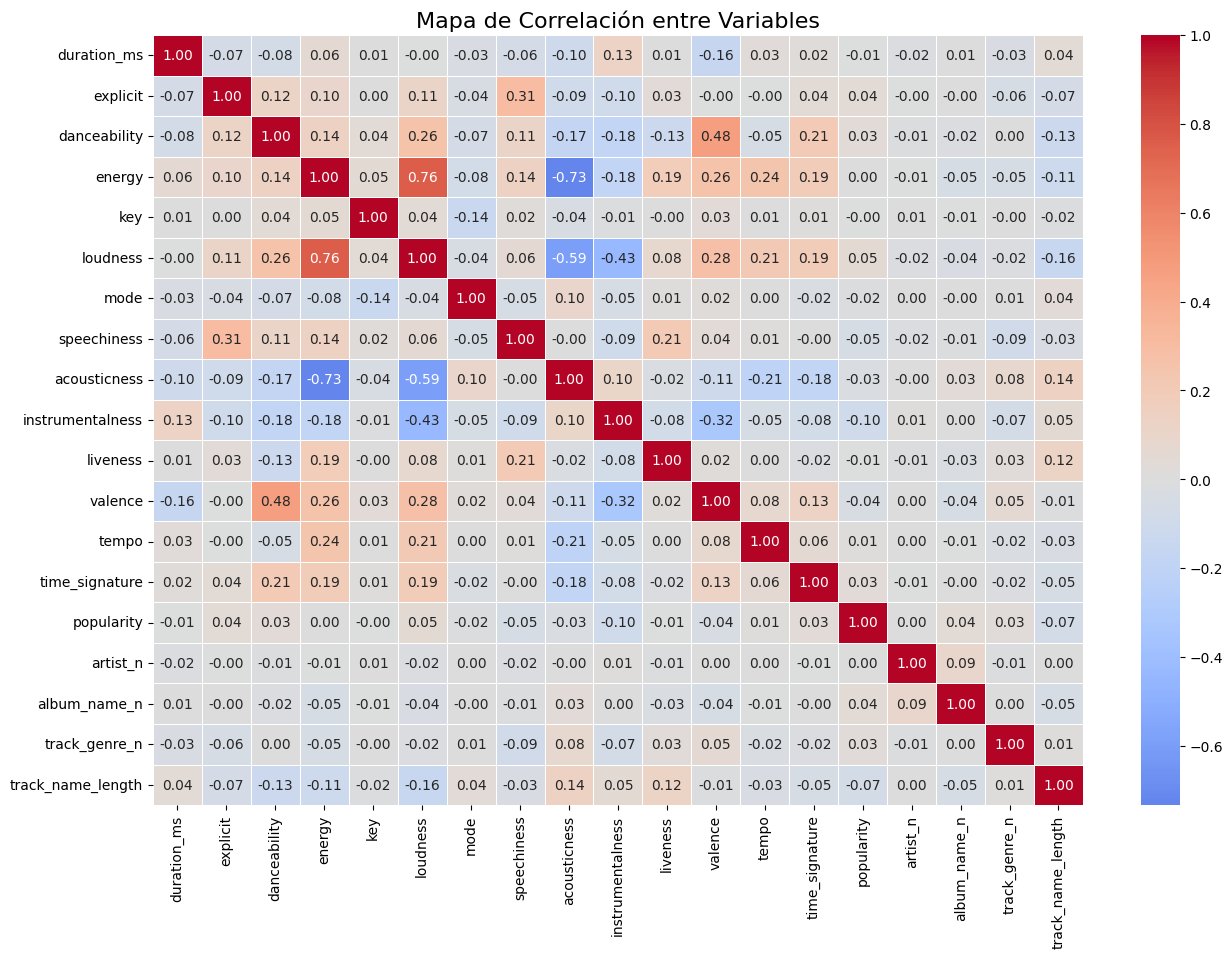

In [15]:
# Calcular la matriz de correlación (solo variables numéricas)
corr_matrix = df_Train.corr(numeric_only=True)

plt.figure(figsize=(15, 10))                                                                  # Tamaño del gráfico
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)    # Heatmap
plt.title('Mapa de Correlación entre Variables', fontsize=16)

plt.show()

##### Popularidad vs. variables predictoras (correlaciones mínimas - no representativas)
* En términos generales no se aprecia correlación entre la variable 'popularity' y las variables predictoras, con índices por lo general inferiores a 0.1
* Correlación negativa (-0.1) con la variable 'instrumentalness', posible favorabilidad mínima hacia las pistas con voz (cantadas)
* Correlación negativa (-0.07) con la variable 'track_name_length', longitud del nombre de la canción puede afectar mínima - negativamente la popularidad
* Correlación positiva (0.05) con la variable 'loudness', relacionado con la sonoridad general del la canción, más sonora mejor popularidad

##### Correlación entre variables predictoras
* Correlación positiva alta (0.76) entre las variables 'loudness' y 'energy'
* Correlación positiva alta (0.48) entre las variables 'danceability' y 'valence'
* Correlación negativa alta (-0.73) entre las variables 'acousticness' y 'energy'
* Correlación negativa alta (-0.59) entre las variables 'acousticness' y 'loudness'
* Correlación negativa alta (-0.43) entre las variables 'instrumentalness' y 'loudness'

In [16]:
# Llamado de librerías
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor


In [21]:
""" Preparación de los datos """

X = df_Train.drop(columns='popularity')
y = df_Train['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo Bagging

In [23]:
# Entrenamiento del modelo de árbol de decisión
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_tree = model_dt.predict(X_test)

# Evaluación del árbol de decisión
mae_dt = mean_absolute_error(y_test, y_pred_tree)
mse_dt = mean_squared_error(y_test, y_pred_tree)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_tree)

# Resultados del modelo de árbol de decisión
print("\nEvaluación del modelo de Árbol de Decisión:")
print(f"MAE árbol único: {mae_dt:.2f}")
print(f"MSE árbol único: {mse_dt:.2f}")
print(f"RMSE árbol único: {rmse_dt:.2f}")
print(f"R2 Score árbol único: {r2_dt:.4f}")



Evaluación del modelo de Árbol de Decisión:
MAE árbol único: 14.56
MSE árbol único: 502.12
RMSE árbol único: 22.41
R2 Score árbol único: -0.0123


In [24]:
# Entrenamiento del modelo de Bagging
model_bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=10, min_samples_split=10),  # Árboles más regulados
    n_estimators=100,              # Más árboles
    max_samples=0.8,               # Submuestreo de filas
    max_features=0.8,              # Submuestreo de columnas
    bootstrap=True,                # Muestreo con reemplazo
    random_state=42,
    n_jobs=-1                      # Uso de todos los núcleos para acelerar
)
model_bagging.fit(X_train, y_train)
# Predicción del conjunto de test
y_pred_bagging = model_bagging.predict(X_test)

# Evaluación del modelo de Bagging
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)


# Resultados del modelo de Bagging
print("\nEvaluación del modelo de Bagging:")
print(f"MAE Bagging: {mae_bagging:.2f}")
print(f"MSE Bagging: {mse_bagging:.2f}")
print(f"RMSE Bagging: {rmse_bagging:.2f}")
print(f"R2 Score Bagging: {r2_bagging:.4f}")


Evaluación del modelo de Bagging:
MAE Bagging: 15.47
MSE Bagging: 362.83
RMSE Bagging: 19.05
R2 Score Bagging: 0.2685


In [26]:
# Entrenamiento del modelo de árbol de decisión
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_tree = model_dt.predict(X_test)

# Evaluación del árbol de decisión
mae_dt = mean_absolute_error(y_test, y_pred_tree)
mse_dt = mean_squared_error(y_test, y_pred_tree)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_tree)

# Entrenamiento del modelo de Bagging
model_bagging = BaggingRegressor(estimator=model_dt, n_estimators=100, random_state=42)
model_bagging.fit(X_train, y_train)
y_pred_bagging = model_bagging.predict(X_test)

# Evaluación del modelo de Bagging
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

# Resultados del modelo de árbol de decisión
print("\nEvaluación del modelo de Árbol de Decisión:")
print(f"MAE árbol único: {mae_dt:.2f}")
print(f"MSE árbol único: {mse_dt:.2f}")
print(f"RMSE árbol único: {rmse_dt:.2f}")
print(f"R2 Score árbol único: {r2_dt:.4f}")

# Resultados del modelo de Bagging
print("\nEvaluación del modelo de Bagging:")
print(f"MAE Bagging: {mae_bagging:.2f}")
print(f"MSE Bagging: {mse_bagging:.2f}")
print(f"RMSE Bagging: {rmse_bagging:.2f}")
print(f"R2 Score Bagging: {r2_bagging:.4f}")


Evaluación del modelo de Árbol de Decisión:
MAE árbol único: 14.56
MSE árbol único: 502.12
RMSE árbol único: 22.41
R2 Score árbol único: -0.0123

Evaluación del modelo de Bagging:
MAE Bagging: 11.53
MSE Bagging: 234.55
RMSE Bagging: 15.32
R2 Score Bagging: 0.5271


In [87]:
import numpy as np

# Obtener la importancia promedio de todas las estimadores
importances = np.mean([tree.feature_importances_ for tree in model_bagging.estimators_], axis=0)

# Asociar nombres de columnas
features = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

# Mostrar las top 10 variables
print("Top 10 variables más importantes:")
for i in sorted_idx[:10]:
    print(f"{features[i]}: {importances[i]:.4f}")


Top 10 variables más importantes:
speechiness: 0.0839
mode: 0.0818
danceability: 0.0808
key: 0.0752
time_signature: 0.0729
explicit: 0.0723
acousticness: 0.0715
liveness: 0.0715
instrumentalness: 0.0712
tempo: 0.0691


In [88]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model_bagging, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importances_perm = result.importances_mean

# Asociar nombres de columnas
features = X_test.columns
sorted_idx = np.argsort(importances_perm)[::-1]

print("Top 10 variables más importantes (perm. importance):")
for i in sorted_idx[:10]:
    print(f"{features[i]}: {importances_perm[i]:.4f}")


Top 10 variables más importantes (perm. importance):
track_genre_n: 0.1235
album_name_n: 0.1059
instrumentalness: 0.0502
acousticness: 0.0423
valence: 0.0276
duration_ms: 0.0252
danceability: 0.0217
energy: 0.0206
artist_n: 0.0181
loudness: 0.0172


In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_bagging, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE promedio (CV):", -scores.mean())


MAE promedio (CV): 15.450147081493693


In [84]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Entrenar el modelo
model_xgb = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# Validación cruzada
scores_xgb = cross_val_score(model_xgb, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE promedio (XGBoost - CV):", -scores_xgb.mean())

# Predicciones en el conjunto de prueba
y_pred_xgb = model_xgb.predict(X_test)

# Evaluación
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Resultados del modelo de XGBoost
print("\nEvaluación del modelo de XGBoost:")
print(f"MAE XGBoost: {mae_xgb:.2f}")
print(f"MSE XGBoost: {mse_xgb:.2f}")
print(f"RMSE XGBoost: {rmse_xgb:.2f}")
print(f"R2 Score XGBoost: {r2_xgb:.4f}")


MAE promedio (XGBoost - CV): 13.170536041259766

Evaluación del modelo de XGBoost:
MAE XGBoost: 13.15
MSE XGBoost: 293.35
RMSE XGBoost: 17.13
R2 Score XGBoost: 0.4067
